##### Participants: Mariuxi Leon, Cameron Milligan, Jorge Gonzalez

# Data Analysis

#### The data consist of the number of people present at different times in gym and also includes additional factor. Using this dataset interesting insights into attendace of the gym shall be derived. Also a predictive model shall ve developed which will, predict the number of people attending the gym given the values of other factors.

## Basic to do list

### Specify the type of data analytic question (e.g. exploration, association causality) before touching the data
#### 1. How attendace is affected by time of the week
#### 2. How attendace is affected by time of the temperature
#### 3. How attendace is affected by the start of the semester
#### 4. Create a model predicting the number of people attending the gym

### Define the metric for success before beginning
#### 1. Logical reasoning shall match
#### 2. Logical reasoning shall match
#### 3. Logical reasoning shall match
#### 4. 90% accuracy

### Business Application
#### This data from university gym. This data consists of information about attendace of the gym and other factors taken at the same timestamp. Using this data a pedictive model can be developed which will predict the attendace of the gym which might be useful for the gym owner.

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sb

# We will use matplotlib to plot figures
import matplotlib.pyplot as plt
%matplotlib inline

# For regression analysis we will use the statsmodels package
import statsmodels.api as sm
import statsmodels.formula.api as smf

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

# This function will help us to create ordinal variables
from pandas.api.types import CategoricalDtype

/Users/cammilligan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/cameronmilligan/d4b77b01e5fd03fd1d1b26f10f9d0c9c/raw/c807fd88a46698170151e283c749de44fde5e7e5/data.csv',)
df = df[["number_people", "timestamp", "day_of_week", "is_weekend", "is_holiday", "temperature", "is_start_of_semester", "is_during_semester", "date", "month", "hour"]]
#converting to celcius
df.temperature = (df.temperature-32)/1.8
df_copy = df.copy()

In [3]:
df.temperature.describe()

count    62184.000000
mean        14.753949
std          3.509109
min          3.411111
25%         12.777778
50%         14.633333
75%         16.822222
max         30.650000
Name: temperature, dtype: float64

In [4]:
df.head(1)

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,date,month,hour
0,37,61211,4,0,0,22.088889,0,0,2015-08-14 17:00:11-07:00,8,17


In [ ]:
df.shape

(62184, 11)

In [ ]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,14.753949,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,3.509109,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.411111,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,12.777778,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,14.633333,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,16.822222,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,30.650000,1.000000,1.000000,12.000000,23.000000


### The dataset seems to be clean because:
​
#### Number of rows for all the data columns are same
#### Maximum number of people = 145 and min = 0 , looks reasonable
#### Maximum timestampvalue = 86399 which is close to 24 hrs which is reasonable
#### Max day of the week = 6 and min = 0 , seems reasonable

#### Below we pair plot, to get pictorial overview of the complete data. Pairplot shows histograms of the columns in diagonal of the matrix and pairwise scatter plot of the data.

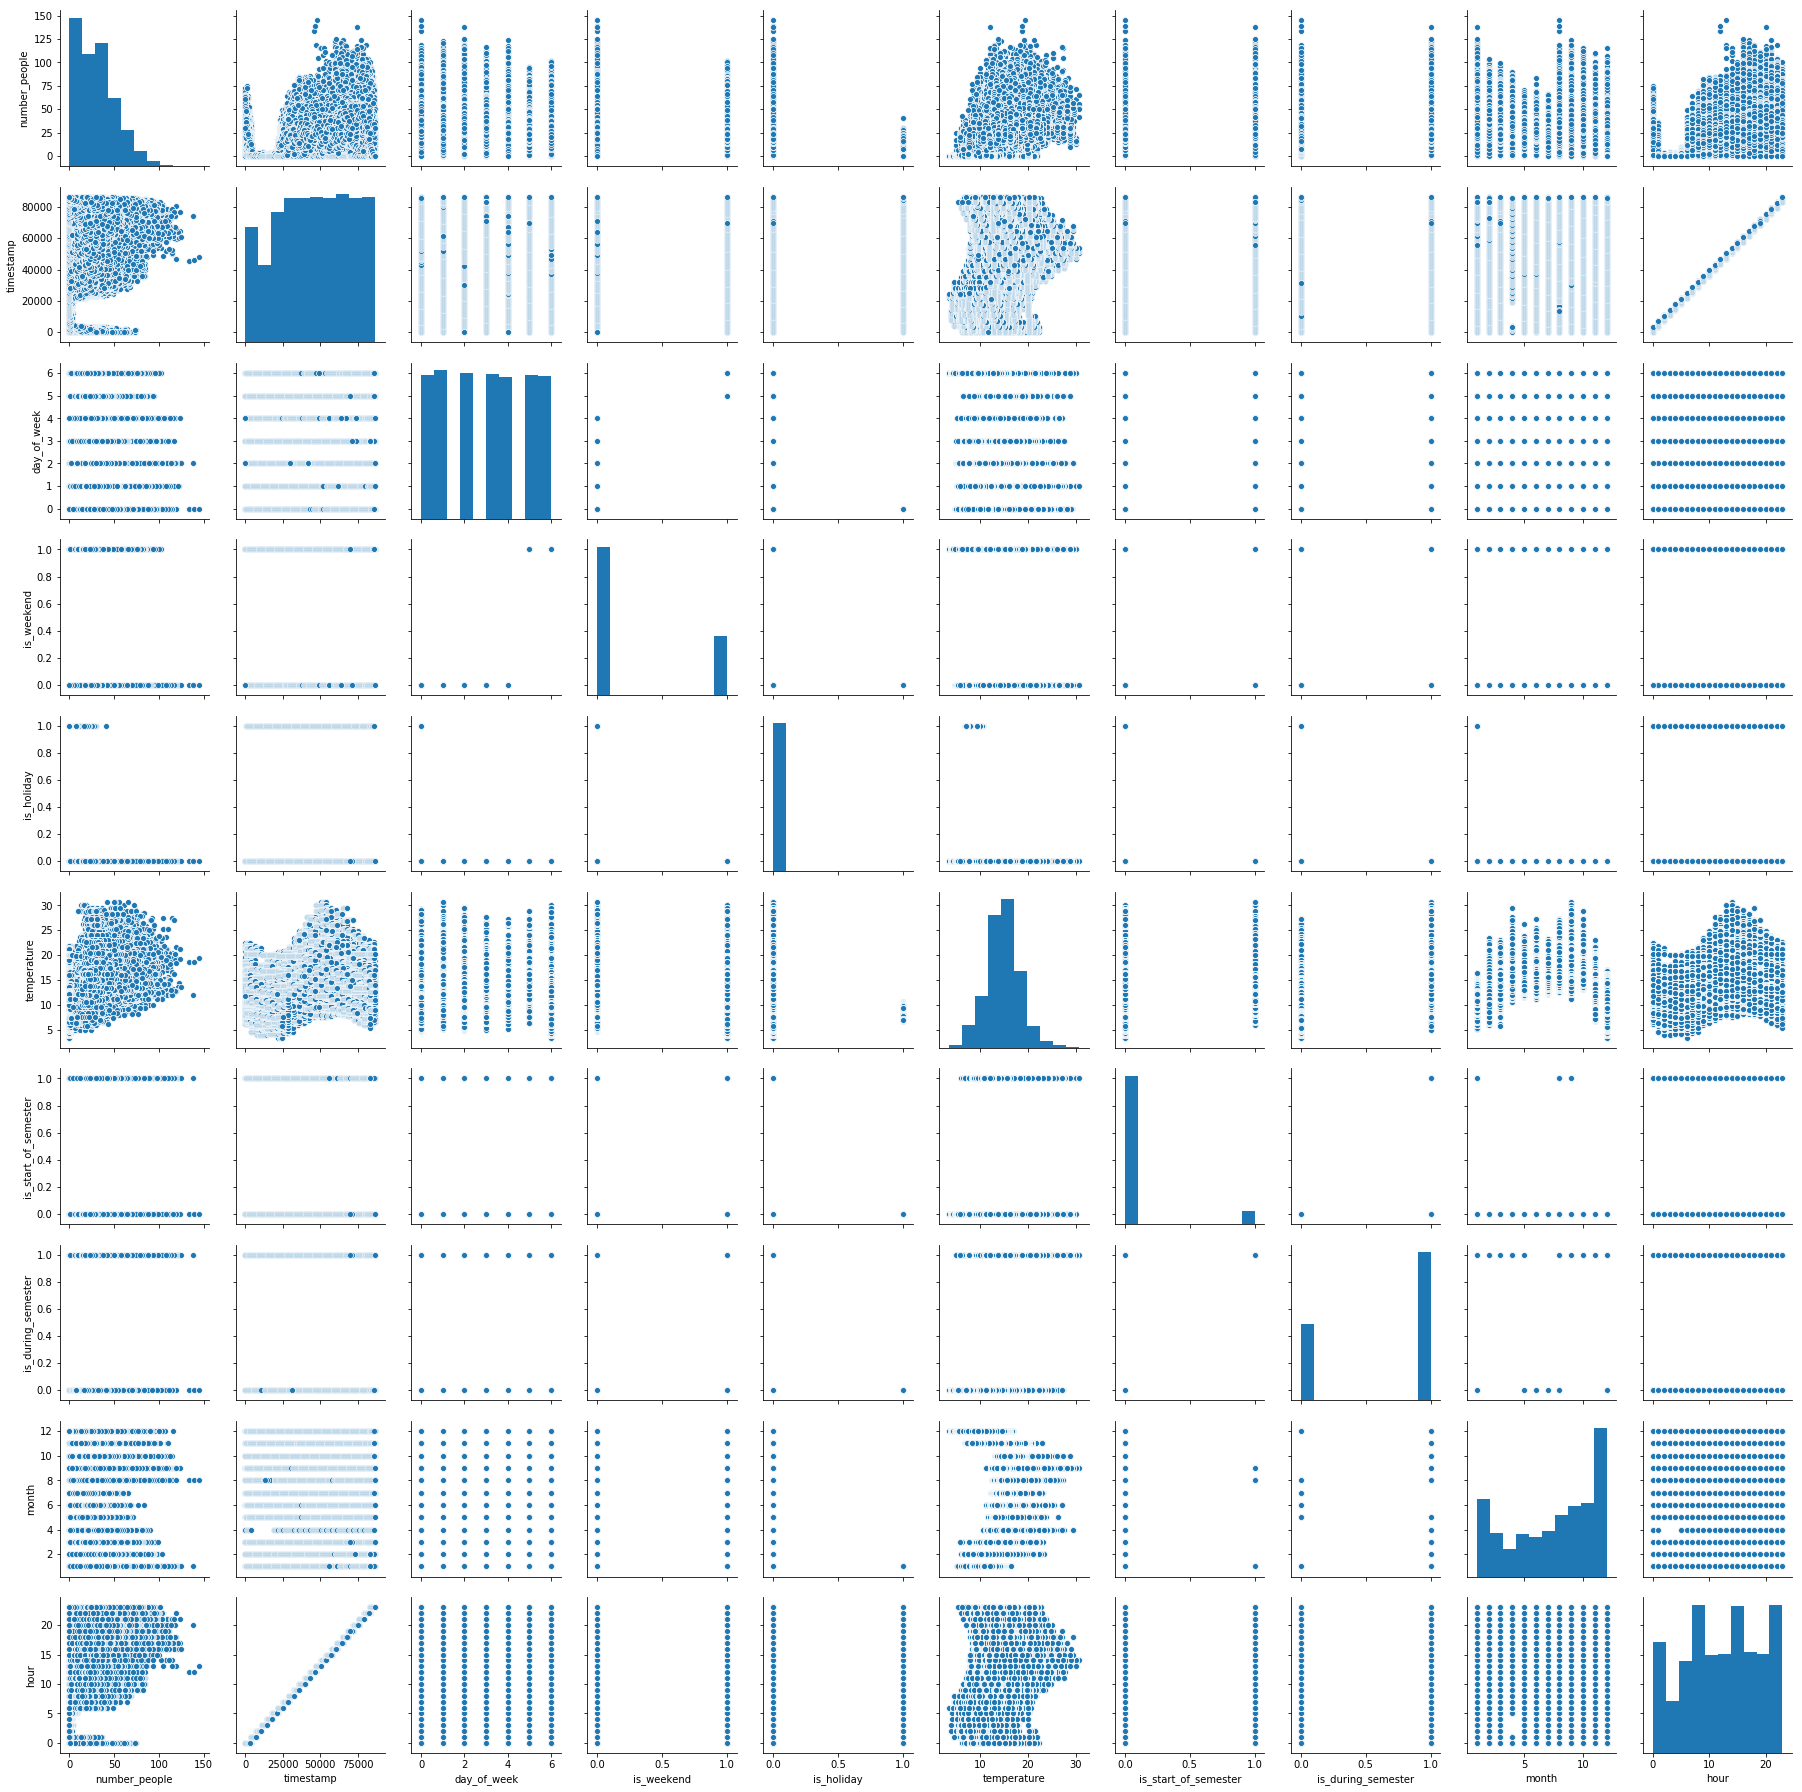

In [ ]:
sb.pairplot(df)

### From above pairplot few things can be implied
​
#### 1. Number of people attending gym and temperatures are showing gaussian distribution which is good thing
#### 2. There is some kind of relationship exiting between temperatures and number of people attending gym

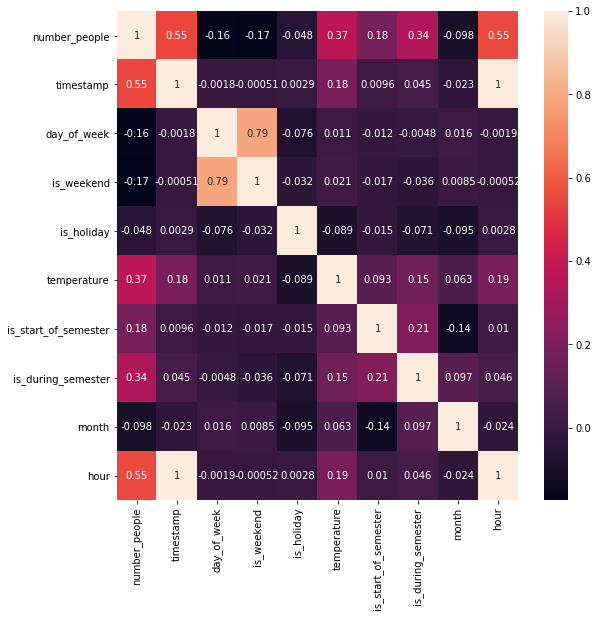

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 9))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False, annot=True)
plt.show()

#### Some of the correlations above can be ignored such as day_of_week and is_weekend being correlated.

#### Some of the correlations that stand out are the hour, day_of_week/is_weekend, temperature and whether or not it is the start of the semester


### Analysis: Hour vs Number of Gym Attendees
#### Hypothesis: A greater number of people are attending the gym later in the day.

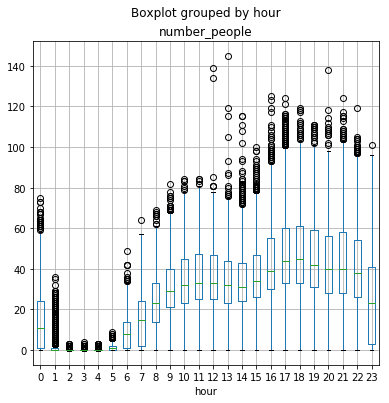

In [ ]:
df.boxplot(column="number_people", by= "hour", figsize= (6,6))

/Users/cammilligan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


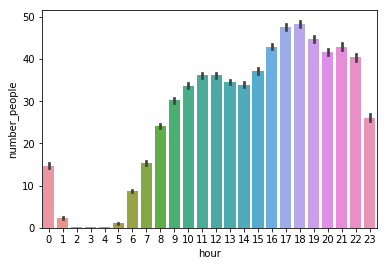

In [ ]:
sb.barplot(x='hour',y='number_people',data=df)

#### Statement: "higher number of people are attending the gym at later hours" appears true from above graph

### Analysis: Day of the Week vs Number of Gym Attendees

#### From pairplot there is negative correlation between day_of_week and number of people going to gym. 

#### Hypothesis: A greater number of people attending the gym on day = 0 i.e monday compared day = 6 i.e sunday.



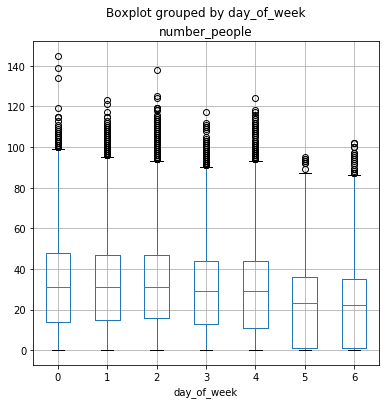

In [ ]:
df.boxplot(column="number_people", by= "day_of_week", figsize= (6,6))

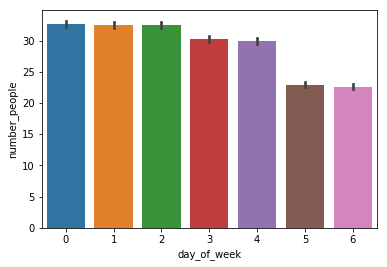

In [ ]:
sb.barplot(x='day_of_week',y='number_people',data=df)

#### Statement: Gym attendance steadily declines from Monday through Sunday.

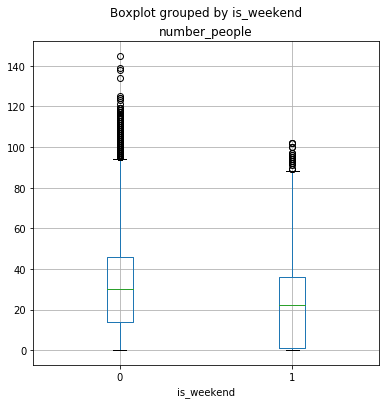

In [ ]:
df.boxplot(column="number_people", by= "is_weekend", figsize= (6,6))

#### The above statement can analyzed in another angle by bucketing the data further and comparing weekdays verse weekend days. It is clear more people attend the gym during the week than on weekends. 

### Analysis: Temperature vs Number of Gym Attendees

#### From correlation plot, there exists the positive correlation between number of people going to gym and temperature.

#### Hypothesis: The higher the temperature the lower the gym attendance. 

#### Temperature data is continuous in nature, so using a histogram is a better way to visualize it compared to boxplots or barcharts

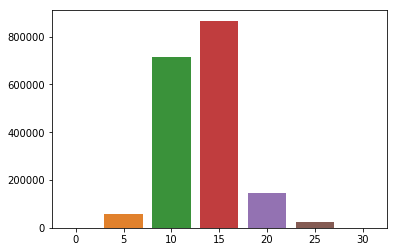

In [ ]:
Bins = []
for i in range(0,35,5):
    people_count = 0
    for index, row in df.iterrows():
        if(row['temperature'] >= i and row['temperature'] < i+5):
            people_count = people_count + row['number_people']
    Bins.append((people_count))
                  
sb.barplot(list(range(0,35,5)),Bins)

In [ ]:
df.plot(kind='bar',x='temperature',y='number_people', figsize=(12,9))

In [ ]:
df.hist(column='temperature',bins=40)

In [ ]:
sb.distplot(df['temperature'], kde=False, rug=True)

#### Even though from the distribution it seems like more people attend gym in warm weather its not true as most number of days weather remains in range 50 to 70. So the analysis that more people attend gym during 50 to 70 temperature range is not entirely correct.

In [ ]:
df.boxplot(column="number_people", by= "is_holiday", figsize= (6,6))

In [ ]:
df.boxplot(column="number_people", by= "is_start_of_semester", figsize= (6,6))

In [ ]:
df.boxplot(column="number_people", by= "is_during_semester", figsize= (6,6))

In [ ]:
df.boxplot(column="number_people", by= "month", figsize= (8,8))
#could this basically be the same information as is_during_semester and is_start_of_semester? concerns about overfitting maybe? Worth at least discussing in the assignment

In [ ]:
df.dtypes

In [ ]:
#A lot of the features are categorical, so they habe to be changed to the category datatype
df["day_of_week"] = df["day_of_week"].astype('category')
df["is_weekend"] = df["is_weekend"].astype('category')
df["is_holiday"] = df["is_holiday"].astype('category')
df["is_start_of_semester"] = df["is_start_of_semester"].astype('category')
df["is_during_semester"] = df["is_during_semester"].astype('category')
df["month"] = df["month"].astype('category')
df["hour"] = df["hour"].astype('category')

In [ ]:
# Initialize and fit the model
m1 = smf.ols(formula='number_people ~ day_of_week + is_weekend + is_holiday + temperature + is_start_of_semester + is_during_semester + month + hour', data=df)
m1 = m1.fit()
df['number_people_predicted'] = m1.predict(df)
df['number_people_redisuals'] = df['number_people_predicted'] - df['number_people']
# Residuals mean
print("residuals mean: ",df.number_people_redisuals.mean())
print("residuals mean: ",m1.rsquared)
# Plot histogram of the residuals
plt.hist(df.number_people_redisuals,bins=40)
plt.xlabel('number of people residuals')
plt.title('Including is_weekend')
plt.show()

In [ ]:
print(m1.summary())

In [ ]:
df.head(1)

In [ ]:
# Initialize and fit the model
params = ['day_of_week' , 'is_holiday' , 'temperature' , 'is_start_of_semester' , 'is_during_semester' , 'month' , 'hour']
m2 = smf.ols(formula='number_people ~ day_of_week + is_holiday + temperature + is_start_of_semester + is_during_semester + month + hour', data=df)
m2 = m2.fit()

df['number_people_predicted'] = m2.predict(df)
df['number_people_redisuals'] = df['number_people_predicted'] - df['number_people']
# Residuals mean
print("residuals mean: ",df.number_people_redisuals.mean())
print("residuals mean: ",m2.rsquared)
# Plot histogram of the residuals
plt.hist(df.number_people_redisuals,bins=40)
plt.xlabel('number of people residuals')
plt.title('Without is_weekend')
plt.show()


In [ ]:
print(m2.summary())

## **Analysis**

**At start of semester people tend to go to gym more**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier,SGDRegressor

In [ ]:

df2 = df_copy.copy()
y = df2['number_people'].values
df2_X = df2.drop(['number_people','date','timestamp','is_weekend'],axis=1)
X = df2_X.values
df2.head(2)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.40)



In [ ]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
sdg = SGDRegressor()
sdg.fit(Xtrain, ytrain)
y_val_l = sdg.predict(Xtest)
print(sdg.score(Xtest, ytest))

In [ ]:
radm = RandomForestRegressor(n_estimators=100)
radm.fit(Xtrain, ytrain)

print(radm.score(Xtest, ytest))



## **Analysis**

**The predictive model can predict number of people attending the gym with 91% accuracy**

In [ ]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df2_X.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df2_X.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

In [ ]:
df2['number_people_predicted'] = radm.predict(X)

In [ ]:
df2['number_people_redisuals'] = df2['number_people_predicted'] - df2['number_people']
# Residuals mean
print("residuals mean: ",df2.number_people_redisuals.mean())
# Plot histogram of the residuals
plt.hist(df2.number_people_redisuals,bins=40)
plt.xlabel('number of people residuals')
plt.title('Random Forest Residuals')
plt.show()

## **Analysis**

**Below is the list of the factors affecting the number of people attending gym ranked from top to bottom in decreasing imprtance manner:**

1.   Hour
2.   Temperature
3. Is during semester
4. Day of week
5. Month
6. Is start of semester
7. Is holiday



